In [1]:
# Description: Sentiment Analysis program that uses Twitter API to parse tweets and analyze overall sentiment of text
# Author: Kashish Kharbanda

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [18]:
# Twitter API credentials
api_creds = np.loadtxt('API-creds.txt', dtype = 'str')
consumer_key = api_creds[0]
consumer_secret = api_creds[1]
access_token = api_creds[2]
access_secret = api_creds[3]

In [19]:
# Authentication and set object
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)
authenticate.set_access_token(access_token, access_secret)

In [20]:
# Creating the API + passing auth info 
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [21]:
# Extract 100 tweets from the twitter user
account = 'BarackObama' # fill with any other twitter handle 
posts = api.user_timeline(screen_name = account, count = 100, lang = 'en', tweet_mode = 'extended')

print('5 most recent tweets by @' + account + ':\n')
i = 1
for tweet in posts[0:5]:
    print(str(i) + '. ' + tweet.full_text + '\n')
    i += 1

5 most recent tweets by @BarackObama:

1. During our time in the White House, Michelle and I were proud to display artwork from artists like Alma Thomas and Charles Alston—whose work provoked thought, challenged our assumptions, and shaped how we define our narrative as a country. https://t.co/eDd76kmlc1

2. There is a lot of disinformation out there, but here’s the truth: You should get a COVID vaccine as soon as it's available to you. It could save your life—or a loved one’s.
https://t.co/jfRr8es6gW

3. Climate change is a real threat to us all—but feeling helpless or overwhelmed isn’t going to solve it. As long as we stay hopeful and keep working with the urgency the challenge demands, we can make a difference. https://t.co/AK1fYVdmzy

4. I’m proud to announce that the Obama Presidential Center will officially break ground in 2021. Our hope is that the center will breathe new life into historic Jackson Park while delivering jobs, growth, and much more to the South Side.

Let’s get t

In [22]:
# Create dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df

,Tweets
0,"During our time in the White House, Michelle a..."
1,"There is a lot of disinformation out there, bu..."
2,Climate change is a real threat to us all—but ...
3,I’m proud to announce that the Obama President...
4,Black-owned independent bookstores play a crit...
...,...
95,Always great talking to @KingJames and @MavCar...
96,"Second, volunteer—you can make calls or text v..."
97,If you're wondering how you can support @JoeBi...
98,What we do in these next four days will not ju...


In [8]:
# Function to clean tweet text
def cleanText(txt):
    txt = re.sub(r'@[A-Za-z0-9]+:?[\s]+', '', txt) # Remove @ mentions
    txt = re.sub(r'#', '', txt) # Remove '#' symbol
    txt = re.sub(r'RT[\s]+', '', txt) # Remove 'RT' for retweets
    txt = re.sub(r'https?:\/\/\S+', '', txt) # Removes any links
    txt = re.sub(r'\n', ' ', txt) # Removes '\n' for enter
    return txt

In [9]:
df['Tweets'] = df['Tweets'].apply(cleanText)
df

,Tweets
0,"During our time in the White House, Michelle a..."
1,"There is a lot of disinformation out there, bu..."
2,Climate change is a real threat to us all—but ...
3,I’m proud to announce that the Obama President...
4,Black-owned independent bookstores play a crit...
...,...
95,Always great talking to and about everything f...
96,"Second, volunteer—you can make calls or text v..."
97,If you're wondering how you can support in the...
98,What we do in these next four days will not ju...


In [10]:
# Create a function to get subjectivity - how subjective/opiniated text is
def getSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

# Create a function to get polarity - how positive/negative text is
def getPolarity(txt):
    return TextBlob(txt).sentiment.polarity

# Add as columns to df
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,"During our time in the White House, Michelle a...",0.500000,0.400000
1,"There is a lot of disinformation out there, bu...",0.600000,0.550000
2,Climate change is a real threat to us all—but ...,0.350000,0.075000
3,I’m proud to announce that the Obama President...,0.359091,0.206061
4,Black-owned independent bookstores play a crit...,0.586905,0.092857
...,...,...,...
95,Always great talking to and about everything f...,0.875000,0.587500
96,"Second, volunteer—you can make calls or text v...",0.000000,0.000000
97,If you're wondering how you can support in the...,0.611111,0.250000
98,What we do in these next four days will not ju...,0.041667,0.000000


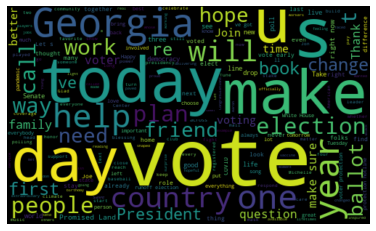

In [11]:
# Word Cloud plot
words = ' '.join([tweets for tweets in df['Tweets']])
wordcloud = WordCloud(width = 500, height = 300, max_font_size = 110).generate(words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [12]:
# Function to compute negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"During our time in the White House, Michelle a...",0.500000,0.400000,Positive
1,"There is a lot of disinformation out there, bu...",0.600000,0.550000,Positive
2,Climate change is a real threat to us all—but ...,0.350000,0.075000,Positive
3,I’m proud to announce that the Obama President...,0.359091,0.206061,Positive
4,Black-owned independent bookstores play a crit...,0.586905,0.092857,Positive
...,...,...,...,...
95,Always great talking to and about everything f...,0.875000,0.587500,Positive
96,"Second, volunteer—you can make calls or text v...",0.000000,0.000000,Neutral
97,If you're wondering how you can support in the...,0.611111,0.250000,Positive
98,What we do in these next four days will not ju...,0.041667,0.000000,Neutral


In [13]:
# Positive Tweets
sortedDF = df.sort_values(by=['Polarity'])
j = 1
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Positive':
        print(str(j) + ". " + sortedDF['Tweets'][i] + "\n")
        j += 1

1. During our time in the White House, Michelle and I were proud to display artwork from artists like Alma Thomas and Charles Alston—whose work provoked thought, challenged our assumptions, and shaped how we define our narrative as a country. 

2. There is a lot of disinformation out there, but here’s the truth: You should get a COVID vaccine as soon as it's available to you. It could save your life—or a loved one’s. 

3. Climate change is a real threat to us all—but feeling helpless or overwhelmed isn’t going to solve it. As long as we stay hopeful and keep working with the urgency the challenge demands, we can make a difference. 

4. I’m proud to announce that the Obama Presidential Center will officially break ground in 2021. Our hope is that the center will breathe new life into historic Jackson Park while delivering jobs, growth, and much more to the South Side.  Let’s get to work. 

5. Black-owned independent bookstores play a critical role in communities all across our country. 

In [14]:
# Negative Tweets
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
j = 1
for i in range(0, sortedDF.shape[0]):
    if sortedDF['Analysis'][i] == 'Negative':
        print(str(j) + ". " + sortedDF['Tweets'][i] + "\n")
        j += 1

1. When Jackie Robinson faced down slurs, spiked cleats, and pitches aimed at his head—and stole home anyway—he didn't only change baseball. He changed the world and paved the way for others, including me. On his birthday, we’re called not only to honor that legacy but build on it. 

2. And here’s a look back at the response to last summer’s Black Lives Matter protests.  

3. In A Promised Land, I talk about the decisions I had to make during the first few years of my presidency. Here are some thoughts on how I approach tough questions: 

4. There's a reason some folks are trying to make it hard for you to vote: They know that if you do, things change. And that's why the answer isn't to stay at home. It's to turn out like never before and show them what this country stands for.

5. We’ve got to vote up and down the ticket like never before for Democratic candidates. Join me for a drive-in rally in Georgia with and @ReverendWarnock. 



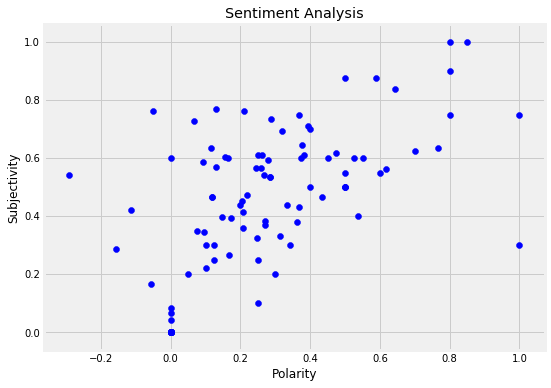

In [15]:
# Plot polarity vs subjectivity
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [16]:
# Calculated percent of positive, negative, or neutral tweets
def percentSentiment(metric): # argument is either 'Positive', 'Negative', or 'Neutral'
    tweets = df[df.Analysis == metric] 
    return str((tweets.shape[0] / df.shape[0]) * 100) + '% of @' + account + '\'s tweets are ' + metric
    
print(percentSentiment('Positive'))
print(percentSentiment('Negative'))
print(percentSentiment('Neutral'))

76.0% of @BarackObama's tweets are Positive
5.0% of @BarackObama's tweets are Negative
19.0% of @BarackObama's tweets are Neutral


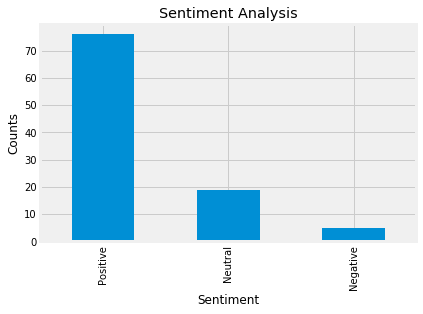

In [17]:
df['Analysis'].value_counts()

# Plot and visualize counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()